## Loads the ROMS data and converts from sigma coordinate to meters.  Saves as NetCDF for input into vertical climate velocity R Script

In [4]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

In [3]:
roms = xr.open_dataset('/Users/nyelab/Downloads/DopAnV2R3-ini2007_da_mon_avg.nc')

In [4]:
roms

<xarray.Dataset>
Dimensions:     (eta_rho: 63, eta_u: 63, eta_v: 62, ocean_time: 168, s_rho: 40, xi_rho: 76, xi_u: 76, xi_v: 77)
Coordinates:
  * ocean_time  (ocean_time) datetime64[ns] 2007-01-17 2007-02-15 ... 2020-12-16
  * s_rho       (s_rho) float64 -0.9875 -0.9625 -0.9375 ... -0.0375 -0.0125
    lat_rho     (eta_rho, xi_rho) float64 ...
    lon_rho     (eta_rho, xi_rho) float64 ...
    lat_u       (eta_u, xi_u) float64 ...
    lon_u       (eta_u, xi_u) float64 ...
    lat_v       (eta_v, xi_v) float64 ...
    lon_v       (eta_v, xi_v) float64 ...
Dimensions without coordinates: eta_rho, eta_u, eta_v, xi_rho, xi_u, xi_v
Data variables:
    salt        (ocean_time, s_rho, eta_rho, xi_rho) float64 ...
    Cs_r        (s_rho) float64 ...
    zeta        (ocean_time, eta_rho, xi_rho) float64 ...
    h           (eta_rho, xi_rho) float64 ...
    hc          float64 ...
    temp        (ocean_time, s_rho, eta_rho, xi_rho) float64 ...
    u           (ocean_time, s_rho, eta_u, xi_u) float64 ...
    v           (ocean_time, s_rho, eta_v, xi_v) float64 ...
Attributes: (12/48)
    file:                       doppio_avg_0366.nc
    format:                     netCDF-4/HDF5 file
    Conventions:                CF-1.4, SGRID-0.3
    type:                       ROMS/TOMS nonlinear model averages file
    title:                      DopAnV2R3-ini2007 - ROMS DOPPIO 7km reanalysi...
    var_info:                   ../Data/varinfo809t_daily.dat
    ...                         ...
    summary:                    doppio
    History:                    Translated to CF-1.0 Conventions by Netcdf-Ja...
    geospatial_lat_min:         37.178910308832386
    geospatial_lat_max:         43.17683923036529
    geospatial_lon_min:         -76.23060799706121
    geospatial_lon_max:         -68.17979698921016

In [ ]:
# the following transformation is from: http://xarray.pydata.org/en/stable/examples/ROMS_ocean_model.html

Zo_rho = (roms.hc * roms.s_rho + roms.Cs_r * roms.h) / (roms.hc + roms.h)
z_rho = roms.zeta + (roms.zeta + roms.h) * Zo_rho

In [ ]:
roms.coords['z_rho'] = z_rho.transpose()   # needing transpose seems to be an xarray bug
roms.temp

In [ ]:
from datetime import datetime as dt
import time

def toYearFraction(date):
    def sinceEpoch(date): # returns seconds since epoch
        return time.mktime(date.timetuple())
    s = sinceEpoch

    year = date.year
    startOfThisYear = dt(year=year, month=1, day=1)
    startOfNextYear = dt(year=year+1, month=1, day=1)

    yearElapsed = s(date) - s(startOfThisYear)
    yearDuration = s(startOfNextYear) - s(startOfThisYear)
    fraction = yearElapsed/yearDuration

    return date.year + fraction


In [ ]:
pandas_dates = pd.to_datetime(roms.ocean_time.values)
new_time = np.empty(len(pandas_dates))
for i in range(len(pandas_dates)):
    new_time[i] = toYearFraction(pandas_dates[i])

In [ ]:
roms.coords['new_time'] = new_time

In [ ]:
roms

In [ ]:
roms.to_netcdf('roms_converted.nc')

In [3]:
roms = xr.open_dataset('roms_converted.nc')

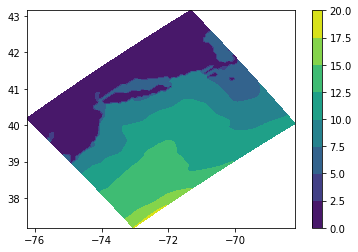

In [112]:
c = plt.contourf(roms.lon_rho[:,:],roms.lat_rho[:,:],roms.temp[0,39,:,:].T)
plt.colorbar(c)

In [ ]:
roms.lat_u


In [ ]:
roms.lat_rho

In [ ]:
roms


In [ ]:
plt.imshow(roms.z_rho[-1,:,:,0])


In [3]:
x = roms.lon_rho
y = roms.lat_rho
z = np.arange(-3000,10,10)

In [7]:
X = np.empty([76,63,301])
Y = np.empty([76,63,301])
Z = np.empty([76,63,301])

In [8]:
for i in range(301):
    X[:,:,i] = x
    Y[:,:,i] = y

In [9]:
for i in range(76):
    for j in range(63):
        Z[i,j,:] = z

In [54]:
roms.temp

<xarray.DataArray 'temp' (ocean_time: 168, s_rho: 40, eta_rho: 63, xi_rho: 76)>
[32175360 values with dtype=float64]
Coordinates:
  * ocean_time  (ocean_time) datetime64[ns] 2007-01-17 2007-02-15 ... 2020-12-16
  * s_rho       (s_rho) float64 -0.9875 -0.9625 -0.9375 ... -0.0375 -0.0125
    lat_rho     (xi_rho, eta_rho) float64 37.18 37.23 37.28 ... 43.11 43.16
    lon_rho     (xi_rho, eta_rho) float64 -73.05 -73.1 -73.15 ... -71.28 -71.33
    z_rho       (s_rho, xi_rho, eta_rho, ocean_time) float64 ...
Dimensions without coordinates: eta_rho, xi_rho
Attributes:
    long_name:      time-averaged potential temperature
    units:          Celsius
    time:           ocean_time
    field:          temperature, scalar, series
    standard_name:  sea_water_potential_temperature

In [15]:
roms.z_rho

<xarray.DataArray 'z_rho' (s_rho: 40, xi_rho: 76, eta_rho: 63, ocean_time: 168)>
[32175360 values with dtype=float64]
Coordinates:
  * ocean_time  (ocean_time) datetime64[ns] 2007-01-17 2007-02-15 ... 2020-12-16
  * s_rho       (s_rho) float64 -0.9875 -0.9625 -0.9375 ... -0.0375 -0.0125
    lat_rho     (xi_rho, eta_rho) float64 37.18 37.23 37.28 ... 43.11 43.16
    lon_rho     (xi_rho, eta_rho) float64 -73.05 -73.1 -73.15 ... -71.28 -71.33
    z_rho       (s_rho, xi_rho, eta_rho, ocean_time) float64 ...
Dimensions without coordinates: xi_rho, eta_rho

In [11]:
from scipy.interpolate import interp1d as int1

In [47]:
test_temp = roms.temp[0,:,20,20]
func = int1(roms.z_rho[:,20,20,0],test_temp,bounds_error = False)

In [87]:
temp_10m = np.empty([76,63,301,168])
for t in range(168):
    for i in range(76):
        for j in range(63):
            Y_data = roms.temp[t,:,j,i]
            if np.any(Y_data)==True:
                func = int1(roms.z_rho[:,i,j,t],Y_data,bounds_error = False)
                temp_10m[i,j,:,t] = func(z)
    print(t)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167


In [102]:
test = xr.DataArray(data = temp_10m, coords = {'lat': roms.lat_rho, 'lon': roms.lon_rho, 'depth': z, 'time': roms.ocean_time}, dims = ['lat','lon','depth','time'])

ValueError: coordinate lat has dimensions ('xi_rho', 'eta_rho'), but these are not a subset of the DataArray dimensions ['lat', 'lon', 'depth', 'time']

###### (roms.z_rho[:,20,20,0])

In [109]:
roms.coords['depth'] = z

AttributeError: 'numpy.ndarray' object has no attribute 'coords'

In [106]:
roms['temp_10m'] = (dims)

MissingDimensionsError: cannot set variable 'temp_10m' with 4-dimensional data without explicit dimension names. Pass a tuple of (dims, data) instead.

In [114]:
roms.coords['depth'] = z

In [120]:
roms['temp_10m'] = (['xi_rho', 'eta_rho', 'depth', 'ocean_time'], temp_10m)

In [124]:
roms.to_netcdf('roms_converted_temp10m.nc')

In [5]:
roms = xr.open_dataset('roms_converted_temp10m.nc')

In [126]:
roms.temp_10m[10,:,:,:]

<xarray.DataArray 'temp_10m' (eta_rho: 63, depth: 301, ocean_time: 168)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [ 2.35545022,  2.42015767,  2.53948954, ...,  2.43446317,
          2.34838713,  2.4754937 ],
        [ 2.36055857,  2.42345493,  2.54200688, ...,  2.43842128,
          2.35132122,  2.47842927],
        ...,
        [17.82302094, 14.55951066, 16.68258597, ..., 22.52381708,
         22.55327629, 19.44082088],
        [17.83300824, 14.5638099 , 16.75242581, ..., 22.6006669 ,
         22.5989774 , 19.44210368],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]]])
Coordinates:
  * ocean_time  (ocean_time) datetime64[ns] 2007-01-17 2007-02-15 ... 2020-12-16
    lat_rho     (eta_rho) float64 37.57 37.62 37.67 37.72 ... 40.5 40.55 40.6
    lon_rho     (eta_rho) float64 -72.42 -72.47 -72.52 ... -75.49 -75.55 -75.6
  * depth       (depth) int64 -3000 -2990 -2980 -2970 -2960 ... -30 -20 -10 0
    temp_10m    (eta_rho, depth, ocean_time) float64 nan nan nan ... 0.0 0.0 0.0
Dimensions without coordinates: eta_rho

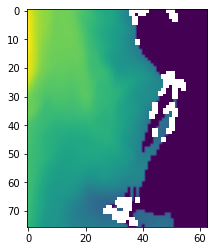

In [135]:
plt.imshow(roms.temp_10m[:,:,299,0])

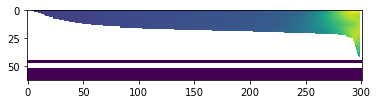

In [59]:
plt.imshow(roms.temp_10m[35,:,:,0])

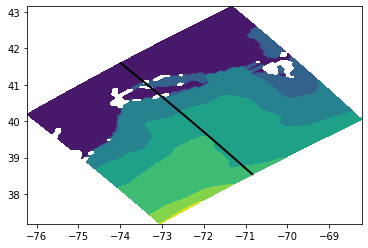

In [325]:
plt.contourf(roms.lon_rho, roms.lat_rho, roms.temp_10m[:,:,299,0])
plt.plot(roms.lon_rho[35,:], roms.lat_rho[35,:],linewidth = 2, c='k')

In [6]:
dist = np.empty(63)
dist25 = np.empty(63)
dist45 = np.empty(63)
dist[:] = np.nan
dist25[:] = np.nan
dist45[:] = np.nan
dist[0] = 0 
dist25[0] = 0
dist45[0] = 0 
import math
R = 6373.0 #radius of the Earth
D = 0
D25 = 0
D45 = 0
for i in range(62):
    lat1 = np.radians(roms.lat_rho[35,i]) #coordinates
    lat1_25 = np.radians(roms.lat_rho[25,i])
    lat1_45 = np.radians(roms.lat_rho[45,i])
    
    lon1 = np.radians(roms.lon_rho[35,i])
    lon1_25 = np.radians(roms.lon_rho[25,i])
    lon1_45 = np.radians(roms.lon_rho[45,i])

    lat2 = np.radians(roms.lat_rho[35,i+1])
    lat2_25 = np.radians(roms.lat_rho[25,i+1])
    lat2_45 = np.radians(roms.lat_rho[45,i+1])

    lon2 = np.radians(roms.lon_rho[35,i+1])
    lon2_25 = np.radians(roms.lon_rho[25,i+1])
    lon2_45 = np.radians(roms.lon_rho[45,i+1])

    dlon = lon2 - lon1 #change in coordinates
    dlon25 = lon2_25 - lon1_25
    dlon45 = lon2_45 - lon1_45
    
    dlat = lat2 - lat1
    dlat25 = lat2_25 - lat1_25
    dlat45 = lat2_45 - lat1_45


    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2 #Haversine formula
    a25 = math.sin(dlat25 / 2)**2 + math.cos(lat1_25) * math.cos(lat2_25) * math.sin(dlon25 / 2)**2
    a45 = math.sin(dlat45 / 2)**2 + math.cos(lat1_45) * math.cos(lat2_45) * math.sin(dlon45 / 2)**2
    
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    c25 = 2 * math.atan2(math.sqrt(a25), math.sqrt(1 - a25))
    c45 = 2 * math.atan2(math.sqrt(a45), math.sqrt(1 - a45))

    distance = (R * c)*1000
    distance25 = (R * c25)*1000
    distance45 = (R * c45)*1000
    
    D = D + distance
    D25 = D25 + distance25
    D45 = D45 + distance45
    dist[i+1] = D
    dist25[i+1] = D25
    dist45[i+1] = D45

In [7]:
ROMS_slice = xr.Dataset(data_vars = {'temp': (['dist', 'depth', 'time'], roms.temp_10m[35,:,:,:].values)},
           coords = {'dist': dist, 'depth':roms.depth.values, 'time':roms.ocean_time.values})

In [8]:
ROMS_slice25 = xr.Dataset(data_vars = {'temp': (['dist', 'depth', 'time'], roms.temp_10m[25,:,:,:].values)},
           coords = {'dist': dist25, 'depth':roms.depth.values, 'time':roms.ocean_time.values})

In [9]:
ROMS_slice45 = xr.Dataset(data_vars = {'temp': (['dist', 'depth', 'time'], roms.temp_10m[45,:,:,:].values)},
           coords = {'dist': dist45, 'depth':roms.depth.values, 'time':roms.ocean_time.values})

In [195]:
ROMS_slice.to_netcdf('roms_slice.nc')

In [10]:
month_counter = np.arange(1, 169)
new_num = 0
cumulative_time = np.empty(168)
cumulative_time[:] = np.nan
for i in np.arange(len(month_counter)):
    num = month_counter[i]
    new_num = new_num + num
    cumulative_time[i] = new_num
cumulative_time[-2:]

array([14028., 14196.])

In [11]:
sx = 14196
sx25 = 14196
sx45 = 14196

In [12]:
sy = np.sum(ROMS_slice.temp,2)
sy25 = np.sum(ROMS_slice25.temp,2)
sy45 = np.sum(ROMS_slice45.temp,2)

In [13]:
month_counter = np.arange(1, 169)
new_num = 0
cumulative_time2 = np.empty(168)
cumulative_time2[:] = np.nan
for i in np.arange(len(month_counter)):
    num = month_counter[i]*month_counter[i]
    new_num = new_num + num
    cumulative_time2[i] = new_num
cumulative_time2[-2:]

array([1566460., 1594684.])

In [14]:
sxx = 1594684
sxx25 = 1594684
sxx45 = 1594684

In [55]:
syy = np.sum(ROMS_slice.temp**2,2)
syy25 = np.sum(ROMS_slice25.temp**2,2)
syy45 = np.sum(ROMS_slice45.temp**2,2)

In [16]:
xy = np.empty([63,301,168])
xy25 = np.empty([63,301,168])
xy45 = np.empty([63,301,168])
xy[:,:,:] = np.nan
xy25[:,:,:] = np.nan
xy45[:,:,:] = np.nan
for i in range(168):
    xy[:,:,i] = ROMS_slice.temp[:,:,i] * month_counter[i]
    xy25[:,:,i] = ROMS_slice25.temp[:,:,i] * month_counter[i]
    xy45[:,:,i] = ROMS_slice45.temp[:,:,i] * month_counter[i]

In [58]:
sxy = np.sum(xy,2)
sxy25 = np.sum(xy25,2)
sxy45 = np.sum(xy45,2)
np.shape(xy)

(63, 301, 168)

In [18]:
N = np.empty([63,301])
N[:,:] = 168

In [19]:
slope = ((N*sxy)-(sx*sy))/(N*sxx-(sx**2))
slope25 = ((N*sxy25)-(sx25*sy25))/(N*sxx25-(sx25**2))
slope45 = ((N*sxy45)-(sx45*sy45))/(N*sxx45-(sx45**2))

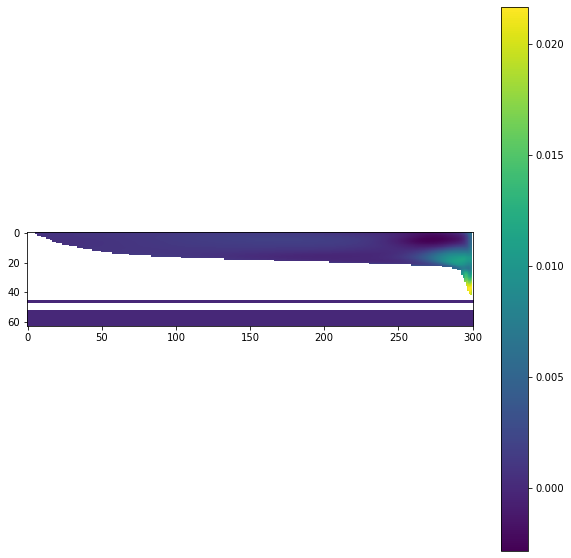

In [20]:
fig,ax = plt.subplots(figsize = [10,10])
C = plt.imshow(slope)
plt.colorbar(C)

In [21]:
sres = (N*syy-sy**2-slope**2*(N*sxx-sx**2))/(N*(N-2))

In [22]:
SE = (np.sqrt((N*sres)/(N*sxx-sx**2)))

In [23]:
Test = slope/SE
Test

<xarray.DataArray 'temp' (dist: 63, depth: 301)>
array([[       nan,        nan,        nan, ..., 0.96375451, 0.99133498,
               nan],
       [       nan,        nan,        nan, ..., 0.85129106, 0.88910351,
               nan],
       [       nan,        nan,        nan, ..., 0.78455329, 0.82667176,
               nan],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])
Coordinates:
  * dist     (dist) float64 0.0 7.003e+03 1.401e+04 ... 4.263e+05 4.333e+05
  * depth    (depth) int64 -3000 -2990 -2980 -2970 -2960 ... -40 -30 -20 -10 0

In [303]:
ROMS_slice.dist[200:]

<xarray.DataArray 'dist' (dist: 0)>
array([], dtype=float64)
Coordinates:
  * dist     (dist) float64

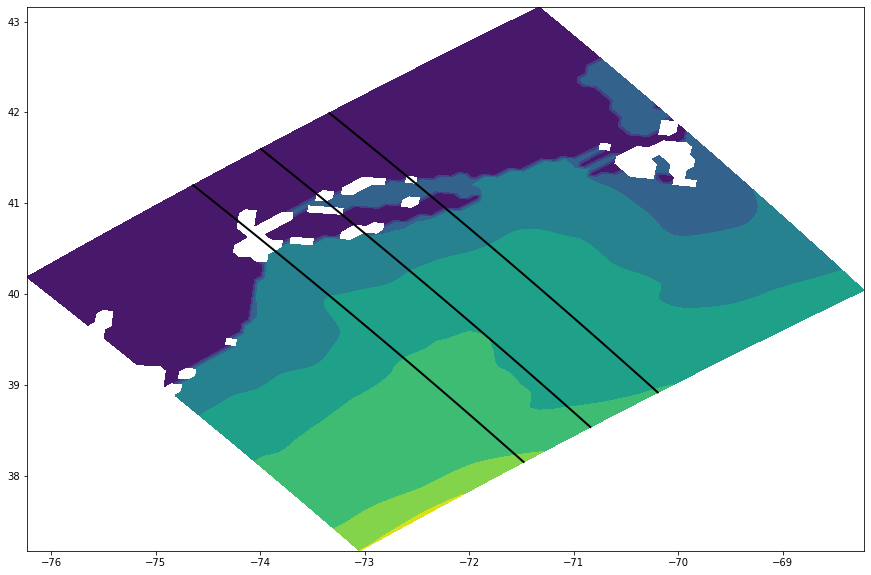

In [24]:
fig, ax = plt.subplots(figsize = [15,10])
plt.contourf(roms.lon_rho, roms.lat_rho, roms.temp_10m[:,:,299,0])
plt.plot(roms.lon_rho[35,:], roms.lat_rho[35,:],linewidth = 2, c='k')
plt.plot(roms.lon_rho[45,:], roms.lat_rho[45,:],linewidth = 2, c='k')
plt.plot(roms.lon_rho[25,:], roms.lat_rho[25,:],linewidth = 2, c='k')

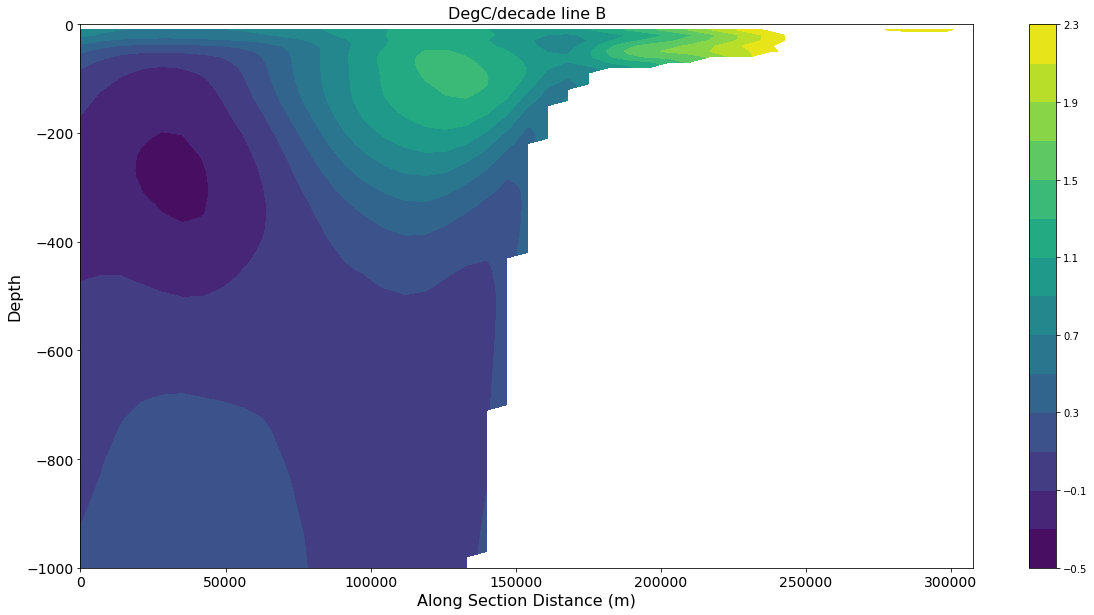

In [25]:
fig,ax = plt.subplots(figsize = [20,10])
C = plt.contourf(ROMS_slice.dist[:45], ROMS_slice.depth[200:], (slope[:45,200:]*120).T, levels=np.arange(-0.5,2.5,0.2))
ax.set_ylabel('Depth',fontsize = 16)
ax.set_xlabel('Along Section Distance (m)',fontsize = 16)
ax.tick_params(labelsize = 14)
ax.set_title('DegC/decade line B', fontsize = 16)
plt.colorbar(C)

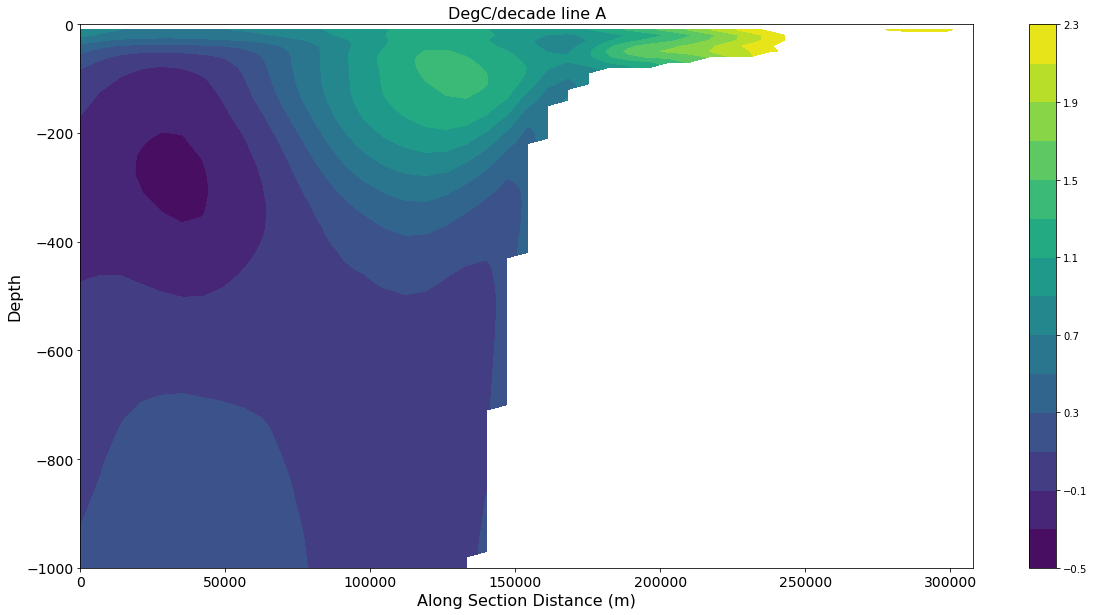

In [26]:
fig,ax = plt.subplots(figsize = [20,10])
C = plt.contourf(ROMS_slice25.dist[:45], ROMS_slice25.depth[200:], (slope[:45,200:]*120).T, levels=np.arange(-0.5,2.5,0.2))
ax.set_ylabel('Depth',fontsize = 16)
ax.set_xlabel('Along Section Distance (m)',fontsize = 16)
ax.tick_params(labelsize = 14)
ax.set_title('DegC/decade line A', fontsize = 16)
plt.colorbar(C)

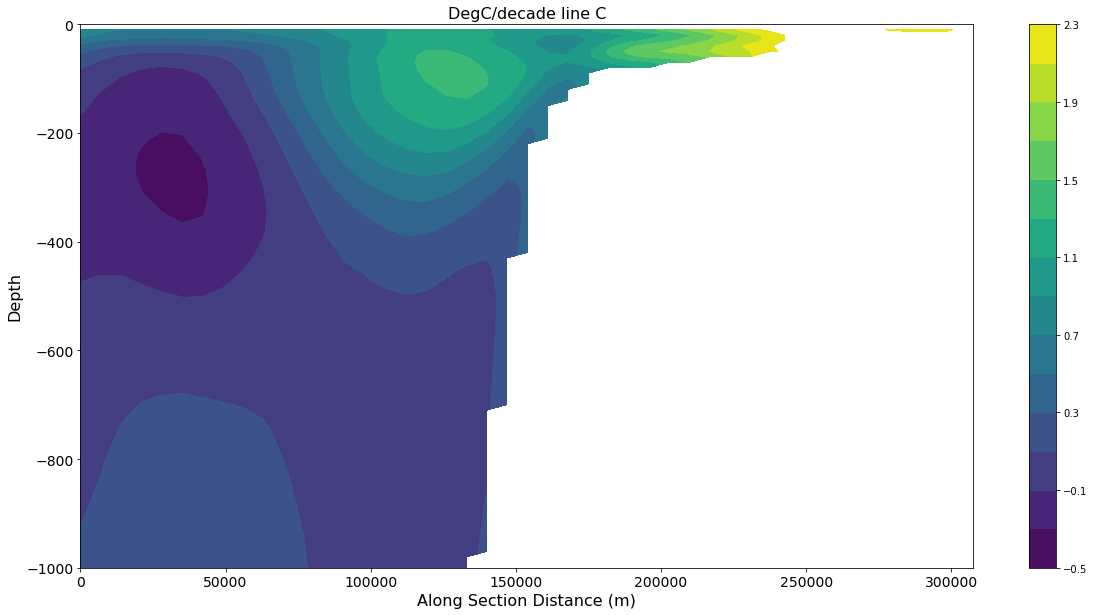

In [27]:
fig,ax = plt.subplots(figsize = [20,10])
C = plt.contourf(ROMS_slice45.dist[:45], ROMS_slice45.depth[200:], (slope[:45,200:]*120).T, levels=np.arange(-0.5,2.5,0.2))
ax.set_ylabel('Depth',fontsize = 16)
ax.set_xlabel('Along Section Distance (m)',fontsize = 16)
ax.tick_params(labelsize = 14)
ax.set_title('DegC/decade line C', fontsize = 16)
plt.colorbar(C)

NameError: name 'significant' is not defined

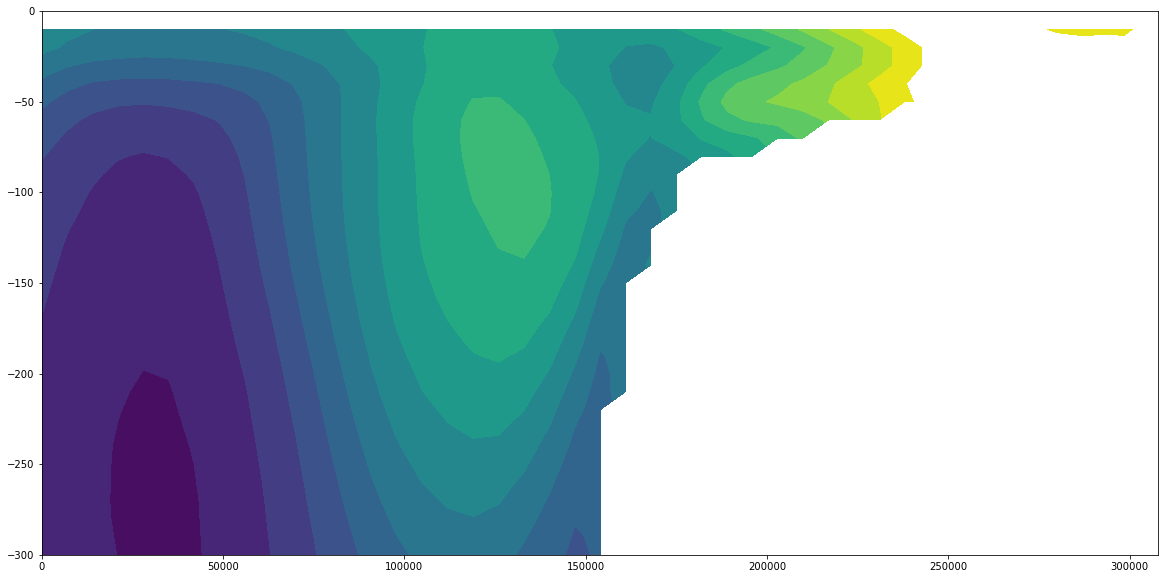

In [28]:
fig,ax = plt.subplots(figsize = [20,10])
C = plt.contourf(ROMS_slice.dist[:45], ROMS_slice.depth[270:], (slope[:45,270:]*120).T, levels=np.arange(-0.5,2.5,0.2))
C2 = plt.contourf(ROMS_slice.dist[:45],ROMS_slice.depth[270:], significant[:45,270:].T, 3, colors='none', hatches = ['','/'], alpha = 0.15)
ax.set_ylabel('Depth',fontsize = 16)
ax.set_xlabel('Along Section Distance (m)',fontsize = 16)
ax.tick_params(labelsize = 14)
ax.set_title('DegC/decade', fontsize = 16)
plt.colorbar(C)

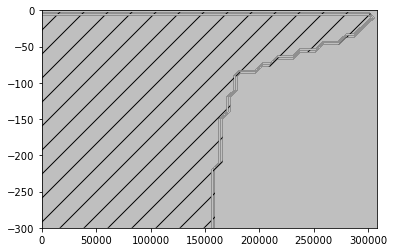

In [389]:
C2 = plt.contourf(ROMS_slice.dist[:45],ROMS_slice.depth[270:], significant[:45,270:].T, 3, colors='none', hatches = ['','/'], alpha = 0.25)


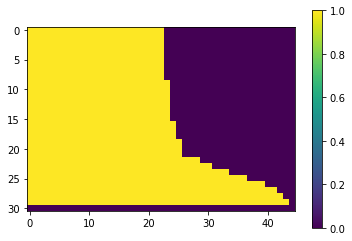

In [369]:
c = plt.imshow(significant[:45,270:].T)
plt.colorbar(c)

In [363]:
significant[:45,270:]

array([[1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [294]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import chi2

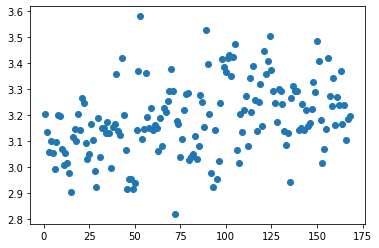

In [285]:
x = np.arange(1,169).reshape(-1,1)
y = ROMS_slice.temp[10,100,:].values.reshape(-1,1)
plt.scatter(x,y)


In [288]:
reg = LinearRegression()
reg.fit(x,y)
reg.coef_[0][0]

0.0010812700574402325

In [341]:
ROMS_slice.temp

<xarray.DataArray 'temp' (dist: 63, depth: 301, time: 168)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [13.85898344, 11.77657929, 12.81649079, ..., 21.74503323,
         19.5515066 , 17.62952939],
        [13.86174927, 11.7799269 , 12.82187268, ..., 21.95455967,
         19.55860536, 17.62970895],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]]])
Coordinates:
  * dist     (dist) float64 0.0 7.003e+03 1.401e+04 ... 4.263e+05 4.333e+05
  * depth    (depth) int64 -3000 -2990 -2980 -2970 -2960 ... -40 -30 -20 -10 0
  * time     (time) datetime64[ns] 2007-01-17 2007-02-15 ... 2020-12-16

In [351]:
test = np.empty(3)
test[:] = np.nan
test[0] = p_values<0.5
test[1] = p_values>0.5


array([ 1.,  0., nan])

In [29]:
#significant = np.empty([63,301])
#significant[:,:] = np.nan
#import statsmodels.api as sm
#for i in range(63):
#    for j in range(301):
#        mod = sm.OLS(ROMS_slice.temp[i,j,:].values,np.arange(1,169))
#        fii = mod.fit()
#        p_values = fii.summary2().tables[1]['P>|t|']
#        significant[i,j] = p_values<0.5
##x = np.arange(1,169).reshape(1,-1)
##y = ROMS_slice.temp[10,100,:].values.reshape(1,-1)
##scores, pvalues = chi2(x, y)
##pvalues

In [353]:
significant

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

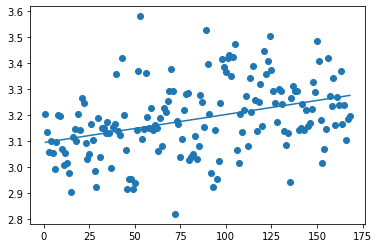

In [292]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x))

In [157]:
import geopy.distance

coords_1 = (52.2296756, 21.0122287)
coords_2 = (52.406374, 16.9251681)

print (geopy.distance.vincenty(coords_1, coords_2).km)

AttributeError: module 'geopy.distance' has no attribute 'vincenty'

In [146]:
test_slice = roms.temp_10m[35,:,:,:]

In [147]:
xr.dataset(data = {'temp': roms.temp_10m[35,:,:,;].values}, coords = {''} )

<xarray.DataArray 'temp_10m' (eta_rho: 63, depth: 301, ocean_time: 168)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [13.85898344, 11.77657929, 12.81649079, ..., 21.74503323,
         19.5515066 , 17.62952939],
        [13.86174927, 11.7799269 , 12.82187268, ..., 21.95455967,
         19.55860536, 17.62970895],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]]])
Coordinates:
  * ocean_time  (ocean_time) datetime64[ns] 2007-01-17 2007-02-15 ... 2020-12-16
    lat_rho     (eta_rho) float64 38.54 38.59 38.64 38.69 ... 41.5 41.55 41.6
    lon_rho     (eta_rho) float64 -70.84 -70.89 -70.94 ... -73.89 -73.94 -73.99
  * depth       (depth) int64 -3000 -2990 -2980 -2970 -2960 ... -30 -20 -10 0
    temp_10m    (eta_rho, depth, ocean_time) float64 nan nan nan ... 0.0 0.0 0.0
Dimensions without coordinates: eta_rho

In [149]:
roms.temp_10m[35,:,:,:].values

array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [13.85898344, 11.77657929, 12.81649079, ..., 21.74503323,
         19.5515066 , 17.62952939],
        [13.86174927, 11.7799269 , 12.82187268, ..., 21.95455967,
         19.55860536, 17.62970895],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [13.72374423, 11.57272431, 12.33920453, ..., 2

In [397]:
test_3x3 = ROMS_slice.temp[9:12,100:103].mean('time')

In [31]:
EE = 7000
WW = 7000
SE = 7000.007
SW = 7000.007
NE = 7000.007
NW = 7000.007
NN = 10
SS = 10
#focal_temp = test_3x3[1,1]

In [410]:
# positive trend is an increase from west to east
EE_grad = (focal_temp - test_3x3[1,0])/EE # angle = 90
WW_grad = (focal_temp - test_3x3[1,2])/WW # angle = 270

In [411]:
NN_grad = (focal_temp - test_3x3[2,1])/NN # angle = 0
SS_grad = (focal_temp - test_3x3[0,1])/SS # angle = 180

In [417]:
SE_grad = (focal_temp - test_3x3[0,0])/SE # angle = 90
SW_grad = (focal_temp - test_3x3[0,2])/SW # angle = 270
NE_grad = (focal_temp - test_3x3[2,0])/NE # angle = 90
NW_grad = (focal_temp - test_3x3[2,2])/NW # angle = 270

In [418]:
NS_net = NN_grad+SS_grad
EW_net = EE_grad + WW_grad +SE_grad + NE_grad + SW_grad + NW_grad

In [431]:
b

<xarray.DataArray 'temp' ()>
array(-3.46341954e-07)
Coordinates:
    dist     float64 7.001e+04

In [426]:
b = EW_net
a = NS_net
np.tan(b/a)

<xarray.DataArray 'temp' ()>
array(0.00285715)
Coordinates:
    dist     float64 7.001e+04
    depth    int64 -1990

In [1]:
np.sqrt(4)

NameError: name 'np' is not defined

In [37]:
ROMS_slice_mean = np.nanmean(ROMS_slice.temp, 2)
spatgrad = np.empty([63,301])
spatgrad[:,:]= np.nan
EW_net = np.empty([63,301])
EW_net[:,:] = np.nan
NS_net = np.empty([63,301])
NS_net[:,:] = np.nan
angle = np. empty([63,301])
angle[:,:] = np. nan

for i in range(1,61):
    for j in range(1,299):
        focal_temp = ROMS_slice_mean[i,j]
        EE_grad = (focal_temp - ROMS_slice_mean[i-1,j])/EE # angle = 90
        WW_grad = -1*((focal_temp - ROMS_slice_mean[i+1,j])/WW) # angle = 270
        NN_grad = (focal_temp - ROMS_slice_mean[i,j+1])/NN # angle = 0
        SS_grad = -1*((focal_temp - ROMS_slice_mean[i,j-1])/SS) # angle = 180
        SE_grad = (focal_temp - ROMS_slice_mean[i-1,j-1])/SE # angle = 90
        SW_grad = -1*((focal_temp - ROMS_slice_mean[i+1,j-1])/SW) # angle = 270
        NE_grad = (focal_temp - ROMS_slice_mean[i-1,j+1])/NE # angle = 90
        NW_grad = -1*((focal_temp - ROMS_slice_mean[i+1,j+1])/NW) # angle = 270
        NS_net[i,j] = NN_grad+SS_grad
        EW_net[i,j] = EE_grad + WW_grad +SE_grad + NE_grad + SW_grad + NW_grad
        theta = np.arctan(NS_net[i,j]/EW_net[i,j])
        if NS_net[i,j] > 0:
            if EW_net[i,j] < 0:
                theta = 360 - theta
        if NS_net[i,j] < 0:
            if EW_net[i,j] < 0:
                theta = 180 + theta
            if EW_net[i,j] > 0:
                theta = 180 - theta
        spatgrad[i,j] = np.sqrt((NS_net[i,j]**2)+(EW_net[i,j]**2))
        angle[i,j] = theta

<ipython-input-37-991ecb945929>:1: RuntimeWarning: Mean of empty slice
  ROMS_slice_mean = np.nanmean(ROMS_slice.temp, 2)
<ipython-input-37-991ecb945929>:24: RuntimeWarning: invalid value encountered in double_scalars
  theta = np.arctan(NS_net[i,j]/EW_net[i,j])


In [34]:
ROMS_slice_mean25 = np.nanmean(ROMS_slice25.temp, 2)
spatgrad25 = np.empty([63,301])
spatgrad25[:,:]= np.nan
angle25 = np. empty([63,301])
angle25[:,:] = np. nan

for i in range(1,61):
    for j in range(1,299):
        focal_temp = ROMS_slice_mean25[i,j]
        EE_grad = (focal_temp - ROMS_slice_mean25[i-1,j])/EE # angle = 90
        WW_grad = (focal_temp - ROMS_slice_mean25[i+1,j])/WW # angle = 270
        NN_grad = (focal_temp - ROMS_slice_mean25[i,j+1])/NN # angle = 0
        SS_grad = (focal_temp - ROMS_slice_mean25[i,j-1])/SS # angle = 180
        SE_grad = (focal_temp - ROMS_slice_mean25[i-1,j-1])/SE # angle = 90
        SW_grad = (focal_temp - ROMS_slice_mean25[i+1,j-1])/SW # angle = 270
        NE_grad = (focal_temp - ROMS_slice_mean25[i-1,j+1])/NE # angle = 90
        NW_grad = (focal_temp - ROMS_slice_mean25[i+1,j+1])/NW # angle = 270
        NS_net = NN_grad+SS_grad
        EW_net = EE_grad + WW_grad +SE_grad + NE_grad + SW_grad + NW_grad
        theta = (EW_net/NS_net)
        if NS_net > 0:
            if EW_net < 0:
                theta = 360 - theta
        if NS_net < 0:
            if EW_net < 0:
                theta = 180 + theta
            if EW_net > 0:
                theta = 180 - theta
        spatgrad25[i,j] = np.sqrt((NS_net**2)+(EW_net**2))
        angle25[i,j] = theta

<ipython-input-34-6d017353176a>:1: RuntimeWarning: Mean of empty slice
  ROMS_slice_mean25 = np.nanmean(ROMS_slice25.temp, 2)
<ipython-input-34-6d017353176a>:20: RuntimeWarning: divide by zero encountered in double_scalars
  theta = (EW_net/NS_net)
<ipython-input-34-6d017353176a>:20: RuntimeWarning: invalid value encountered in double_scalars
  theta = (EW_net/NS_net)


In [35]:
ROMS_slice_mean45 = np.nanmean(ROMS_slice45.temp, 2)
spatgrad45 = np.empty([63,301])
spatgrad45[:,:]= np.nan
angle45 = np. empty([63,301])
angle45[:,:] = np. nan

for i in range(1,61):
    for j in range(1,299):
        focal_temp = ROMS_slice_mean45[i,j]
        EE_grad = (focal_temp - ROMS_slice_mean45[i-1,j])/EE # angle = 90
        WW_grad = (focal_temp - ROMS_slice_mean45[i+1,j])/WW # angle = 270
        NN_grad = (focal_temp - ROMS_slice_mean45[i,j+1])/NN # angle = 0
        SS_grad = (focal_temp - ROMS_slice_mean45[i,j-1])/SS # angle = 180
        SE_grad = (focal_temp - ROMS_slice_mean45[i-1,j-1])/SE # angle = 90
        SW_grad = (focal_temp - ROMS_slice_mean45[i+1,j-1])/SW # angle = 270
        NE_grad = (focal_temp - ROMS_slice_mean45[i-1,j+1])/NE # angle = 90
        NW_grad = (focal_temp - ROMS_slice_mean45[i+1,j+1])/NW # angle = 270
        NS_net = NN_grad+SS_grad
        EW_net = EE_grad + WW_grad +SE_grad + NE_grad + SW_grad + NW_grad
        theta = (EW_net/NS_net)
        if NS_net > 0:
            if EW_net < 0:
                theta = 360 - theta
        if NS_net < 0:
            if EW_net < 0:
                theta = 180 + theta
            if EW_net > 0:
                theta = 180 - theta
        spatgrad45[i,j] = np.sqrt((NS_net**2)+(EW_net**2))
        angle45[i,j] = theta

<ipython-input-35-de5f64aa6241>:1: RuntimeWarning: Mean of empty slice
  ROMS_slice_mean45 = np.nanmean(ROMS_slice45.temp, 2)
<ipython-input-35-de5f64aa6241>:20: RuntimeWarning: divide by zero encountered in double_scalars
  theta = (EW_net/NS_net)
<ipython-input-35-de5f64aa6241>:20: RuntimeWarning: invalid value encountered in double_scalars
  theta = (EW_net/NS_net)


In [504]:
ROMS_slice_mean = np.nanmean(ROMS_slice.temp, 2)
spatgrad = np.empty([63,301])
spatgrad[:,:]= np.nan
angle = np. empty([63,301])
angle[:,:] = np. nan

for i in range(1,61):
    for j in range(1,299):
        focal_temp = ROMS_slice_mean[i,j]
        EE_grad = EE/(focal_temp - ROMS_slice_mean[i-1,j]) # angle = 90
        WW_grad = WW/(focal_temp - ROMS_slice_mean[i+1,j]) # angle = 270
        NN_grad = NN/(focal_temp - ROMS_slice_mean[i,j+1]) # angle = 0
        SS_grad = SS/(focal_temp - ROMS_slice_mean[i,j-1]) # angle = 180
        SE_grad = SE/(focal_temp - ROMS_slice_mean[i-1,j-1]) # angle = 90
        SW_grad = SW/(focal_temp - ROMS_slice_mean[i+1,j-1]) # angle = 270
        NE_grad = NE/(focal_temp - ROMS_slice_mean[i-1,j+1]) # angle = 90
        NW_grad = NW/(focal_temp - ROMS_slice_mean[i+1,j+1]) # angle = 270
        NS_net = NN_grad+SS_grad
        EW_net = EE_grad + WW_grad +SE_grad + NE_grad + SW_grad + NW_grad
        theta = (EW_net/NS_net)
        if NS_net > 0:
            if EW_net < 0:
                theta = 360 - theta
        if NS_net < 0:
            if EW_net < 0:
                theta = 180 + theta
            if EW_net > 0:
                theta = 180 - theta
        spatgrad[i,j] = np.sqrt((NS_net**2)+(EW_net**2))
        angle[i,j] = theta

<ipython-input-504-3b69615e7500>:1: RuntimeWarning: Mean of empty slice
  ROMS_slice_mean = np.nanmean(ROMS_slice.temp, 2)
<ipython-input-504-3b69615e7500>:20: RuntimeWarning: divide by zero encountered in double_scalars
  theta = (EW_net/NS_net)
<ipython-input-504-3b69615e7500>:11: RuntimeWarning: divide by zero encountered in double_scalars
  WW_grad = WW/(focal_temp - ROMS_slice_mean[i+1,j]) # angle = 270
<ipython-input-504-3b69615e7500>:12: RuntimeWarning: divide by zero encountered in double_scalars
  NN_grad = NN/(focal_temp - ROMS_slice_mean[i,j+1]) # angle = 0
<ipython-input-504-3b69615e7500>:13: RuntimeWarning: divide by zero encountered in double_scalars
  SS_grad = SS/(focal_temp - ROMS_slice_mean[i,j-1]) # angle = 180
<ipython-input-504-3b69615e7500>:15: RuntimeWarning: divide by zero encountered in double_scalars
  SW_grad = SW/(focal_temp - ROMS_slice_mean[i+1,j-1]) # angle = 270
<ipython-input-504-3b69615e7500>:17: RuntimeWarning: divide by zero encountered in double_sca

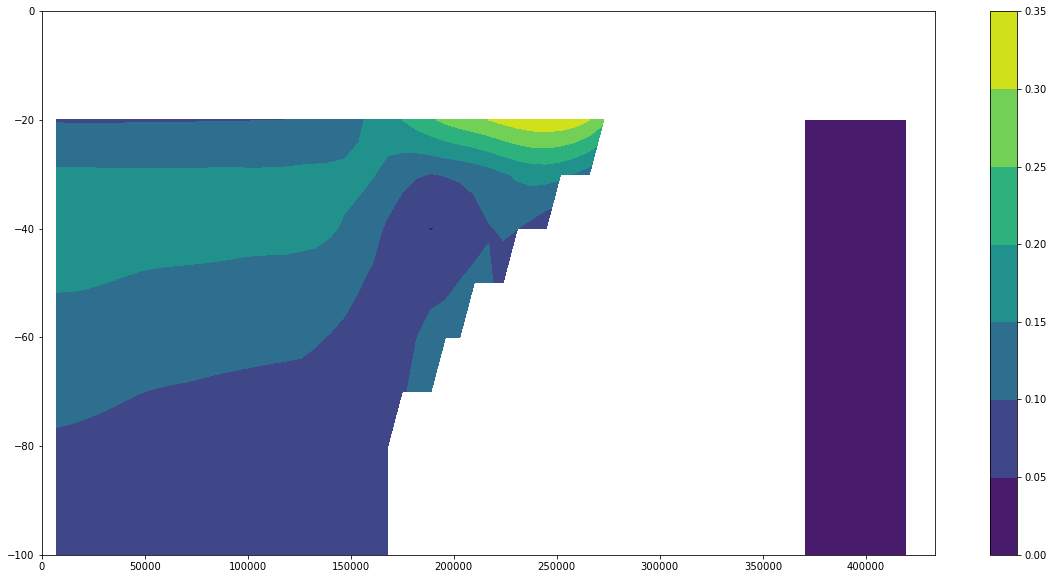

In [33]:
fig,ax = plt.subplots(figsize = [20,10])
c = plt.contourf(ROMS_slice.dist, ROMS_slice.depth[290:], spatgrad[:,290:].T)
plt.colorbar(c)

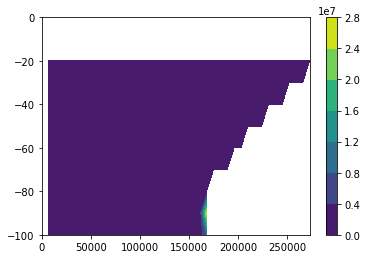

In [493]:
c = plt.contourf(ROMS_slice.dist[:40], ROMS_slice.depth[290:], angle[:40,290:].T)
#plt.arrow(ROMS_slice.dist[:40],ROMS_slice.depth[290:],ew[:40,290:],ns[:40,290:])
plt.colorbar(c)

Text(0.5, 1.0, 'm/decade line B')

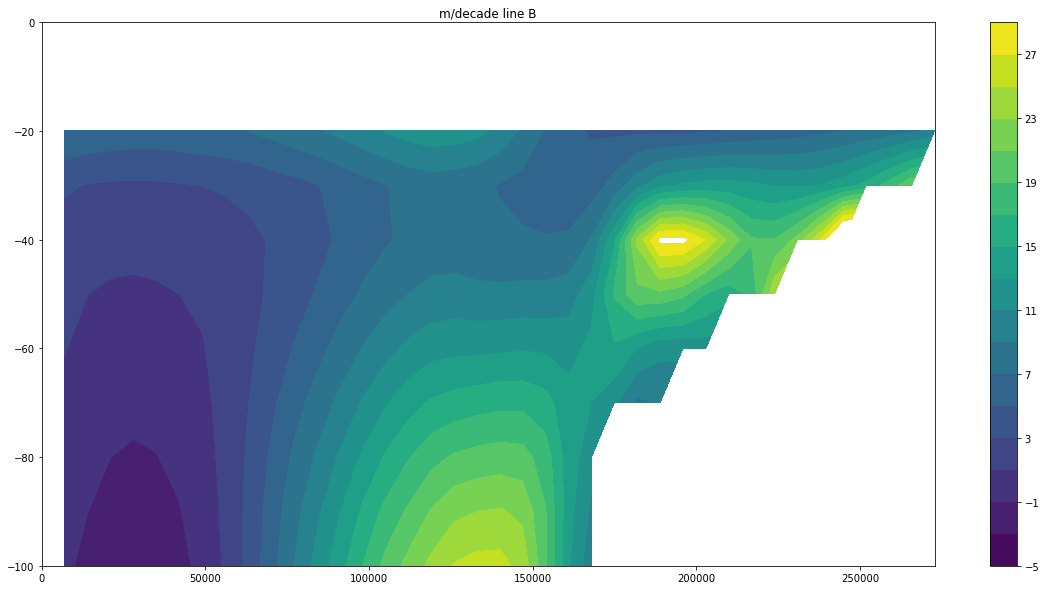

In [50]:
fig,ax = plt.subplots(figsize = [20,10])
c = plt.contourf(ROMS_slice.dist[:40], ROMS_slice.depth[290:], (slope[:40,290:].T*120)/spatgrad[:40,290:].T, levels = np.arange(-5, 30, 2))
x, y = np.meshgrid(ROMS_slice.dist[:40], ROMS_slice.depth[290:])
#plt.quiver(x,y, EW_net[:40,290:].T, NS_net[:40, 290:].T)
plt.colorbar(c)
plt.grid(which = 'minor')
plt.title('m/decade line B')

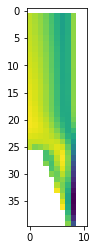

In [45]:
plt.imshow(EW_net[:40,290:])
plt.imshow(NS_net[:40,290:])

Text(0.5, 1.0, 'm/decade line A')

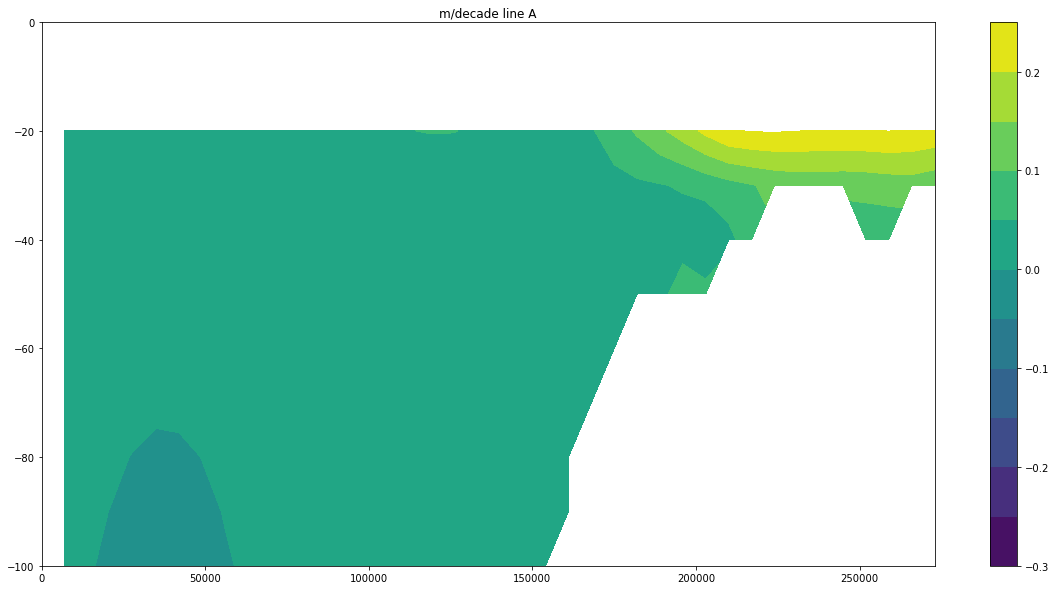

In [40]:
fig,ax = plt.subplots(figsize = [20,10])
c = plt.contourf(ROMS_slice25.dist[:40], ROMS_slice25.depth[290:], spatgrad25[:40,290:].T * (slope25[:40,290:].T*120), levels = np.arange(-0.3, 0.3, 0.05))
plt.colorbar(c)
plt.title('m/decade line A')

Text(0.5, 1.0, 'm/decade line C')

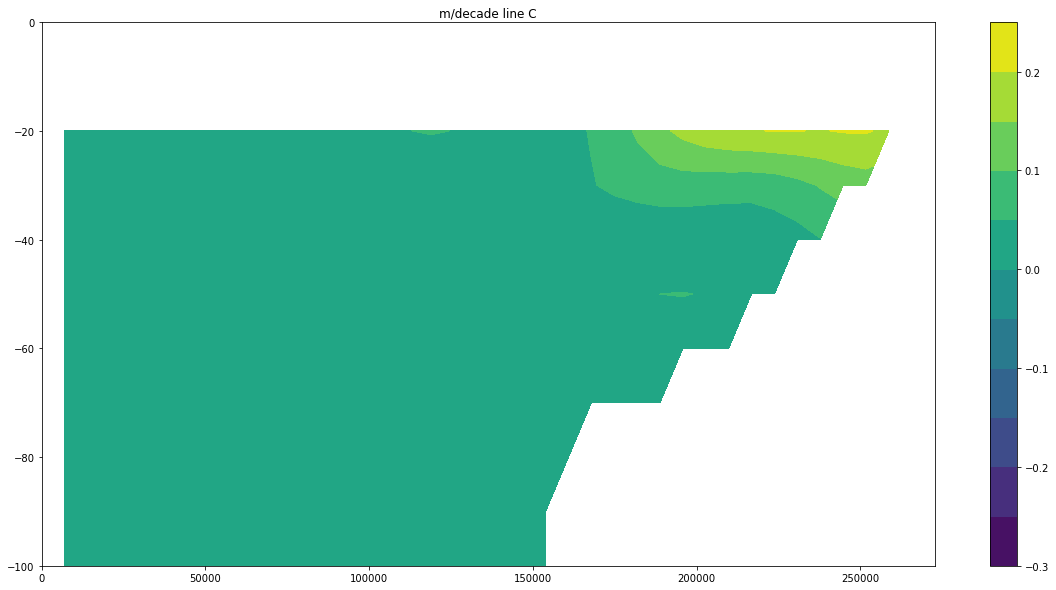

In [41]:
fig,ax = plt.subplots(figsize = [20,10])
c = plt.contourf(ROMS_slice45.dist[:40], ROMS_slice45.depth[290:], spatgrad45[:40,290:].T * (slope45[:40,290:].T*120), levels = np.arange(-0.3, 0.3, 0.05))
plt.colorbar(c)
plt.title('m/decade line C')

In [466]:
tan_angle = np.tan(angle)
# when ns = 10
ew = tan_angle/10
ew
ns = np.empty([63,301])
ns[:,:] = 10

<ipython-input-466-b261a651853b>:1: RuntimeWarning: invalid value encountered in tan
  tan_angle = np.tan(angle)


TypeError: Invalid shape (11,) for image data

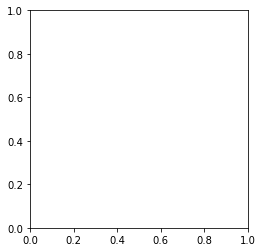

In [478]:
plt.imshow(ROMS_slice.depth[290:])

In [5]:
sst1 = xr.open_dataset('/Users/nyelab/Desktop/NYB Indicators/CalculateIndicators/WaterTemperature/Data/9bd1c68f26ce957283f2705a6f4d351b.nc')

In [6]:
sst2 = xr.open_dataset('/Users/nyelab/Desktop/NYB Indicators/CalculateIndicators/WaterTemperature/Data/9e231e194f77722b4ec78467a053baf6.nc')
sst3 = xr.open_dataset('/Users/nyelab/Desktop/NYB Indicators/CalculateIndicators/WaterTemperature/Data/79b6e789d3e145c094aae90f9600f8b0.nc')
sst4 = xr.open_dataset('/Users/nyelab/Desktop/NYB Indicators/CalculateIndicators/WaterTemperature/Data/a59ac185b8e5d9a34813fee58c0a9fdf.nc')
sst5 = xr.open_dataset('/Users/nyelab/Desktop/NYB Indicators/CalculateIndicators/WaterTemperature/Data/b0988ceaf10f0d2f3287c9d5c4c05cfd.nc')
sst6 = xr.open_dataset('/Users/nyelab/Desktop/NYB Indicators/CalculateIndicators/WaterTemperature/Data/d7a66efb0dd885bc6a6745e9921b6766.nc')
sst7 = xr.open_dataset('/Users/nyelab/Desktop/NYB Indicators/CalculateIndicators/WaterTemperature/Data/OISST_2020JAN_2020APR.nc')

In [7]:
# Put all netcdfs together
sst = xr.merge([sst1,sst2,sst3,sst4,sst5,sst6,sst7])

In [9]:
sst.time


<xarray.DataArray 'time' (time: 13913)>
array(['1982-01-01T12:00:00.000000000', '1982-01-02T12:00:00.000000000',
       '1982-01-03T12:00:00.000000000', ..., '2020-03-30T12:00:00.000000000',
       '2020-03-31T12:00:00.000000000', '2020-04-01T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01T12:00:00 ... 2020-04-01T12:00:00
Attributes:
    _CoordinateAxisType:  Time
    actual_range:         [9.4672800e+08 1.2307248e+09]
    axis:                 T
    ioos_category:        Time
    long_name:            Center time of the day
    standard_name:        time
    time_origin:          01-JAN-1970 00:00:00